In [1]:
import cv2
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers, datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(5000, 1)
(1000, 32, 32, 3)
(1000, 1)


In [4]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
y_test = label_as_binary.fit_transform(y_test)
y_train = label_as_binary.fit_transform(y_train)
y_train.shape

(5000, 10)

In [5]:
model = models.Sequential()

input = (32,32,3)
num_class = 10

#Evrişim Katmanları
model.add(layers.Conv2D(64,kernel_size=(3,3), input_shape=input, activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.Flatten())

#Sınıflandırma Katmanları
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_class, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               5538048   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
epoch = 15
model.fit(x_train, y_train, epochs=epoch, batch_size=512)

Epoch 1/15
10/10 [==============================] - 18s 2s/step - loss: 56.2792 - accuracy: 0.1062
Epoch 2/15
10/10 [==============================] - 17s 2s/step - loss: 2.2972 - accuracy: 0.1266
Epoch 3/15
10/10 [==============================] - 17s 2s/step - loss: 2.2553 - accuracy: 0.1722
Epoch 4/15
10/10 [==============================] - 16s 2s/step - loss: 2.1344 - accuracy: 0.2394
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 1.9158 - accuracy: 0.3227
Epoch 6/15
10/10 [==============================] - 16s 2s/step - loss: 1.6693 - accuracy: 0.4183
Epoch 7/15
10/10 [==============================] - 16s 2s/step - loss: 1.4942 - accuracy: 0.4821
Epoch 8/15
10/10 [==============================] - 16s 2s/step - loss: 1.2926 - accuracy: 0.5602
Epoch 9/15
10/10 [==============================] - 16s 2s/step - loss: 1.0972 - accuracy: 0.6137
Epoch 10/15
10/10 [==============================] - 16s 2s/step - loss: 0.8939 - accuracy: 0.6913
Epoch 11/15
10/10 

157/157 [==============================] - 6s 36ms/step - loss: 0.1747 - accuracy: 0.9590
Eğitim Doğruluğu: % 95.89999914169312
32/32 [==============================] - 1s 35ms/step - loss: 2.6033 - accuracy: 0.3880
Test Doğruluğu: % 38.80000114440918


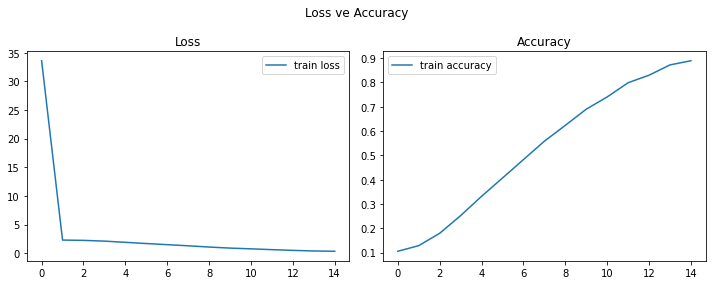

In [9]:
def evaluate_model(model):
    metrics = model.history.history
    
    fig,axes = plt.subplots(1,2, figsize=(10,4))
    fig.suptitle("Loss ve Accuracy")

    axes[0].plot(metrics["loss"], label="train loss")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[1].plot(metrics["accuracy"], label="train accuracy")
    axes[1].set_title("Accuracy")
    axes[1].legend()
    plt.tight_layout()
    plt.legend()

    score_train = model.evaluate(x_train,y_train)
    print("Eğitim Doğruluğu: %",score_train[1]*100)
    score_test = model.evaluate(x_test,y_test)
    print("Test Doğruluğu: %",score_test[1]*100)
    
evaluate_model(model)

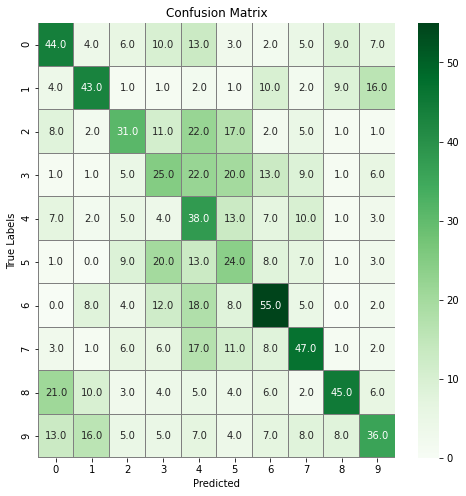

In [10]:
def get_confusion_matrix(model, x_test, y_test):
    
    y_predict = model.predict(x_test)
    y_predict_class = np.argmax(y_predict, axis = 1)
    Y_true = np.argmax(y_test, axis = 1)
    cm = confusion_matrix(Y_true, y_predict_class)

    fig, axes = plt.subplots(figsize=(8,8))
    sbn.heatmap(cm, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=axes)
    plt.xlabel("Predicted")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")

get_confusion_matrix(model, x_test, y_test)

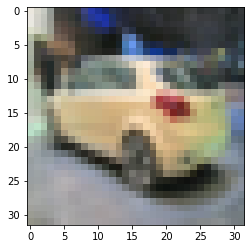

In [47]:
random_number = 369
plt.imshow(x_test[random_number])

In [48]:
def get_class_name(class_no):

    if class_no == 0:
        name = "airplane"
    if class_no == 1:
        name = "automobile"
    if class_no == 2:
        name = "bird"
    if class_no == 3:
        name = "cat"
    if class_no == 4:
        name = "deer"
    if class_no == 5:
        name = "dog"
    if class_no == 6:
        name = "frog"
    if class_no == 7:
        name = "horse"
    if class_no == 8:
        name = "ship"
    if class_no == 9:
        name = "truck"
    
    return name

In [49]:
print(x_test[random_number].shape)

image = x_test[random_number].reshape((1,32,32,3))
image.shape

(32, 32, 3)


(1, 32, 32, 3)

In [50]:
predictions = model.predict(image)
predictions

array([[4.2050221e-08, 9.9379236e-01, 1.7387802e-06, 3.0091057e-06,
        1.9251170e-06, 1.7459710e-05, 5.2076844e-06, 6.3921696e-05,
        6.2816457e-07, 6.1138039e-03]], dtype=float32)

In [51]:
confidence = predictions.max()
class_no = np.argmax(predictions)

print("class -->", get_class_name(class_no))
print("confidence -->", confidence)

class --> automobile
confidence --> 0.99379236
